###### An de grâce 2017, mardi 12 décembre

(a) Déterminer la dépendance temporelle de la charge électrique q (t) sur le condensateur C et le courant I (t) circulant dans l'inductance L et la résistance R dans le RLC série , en supposant qu'à l'instant t0 la valeur de la charge accumulé sur le condensateur est q0 et le courant dans le circuit I0.

(b) Tracer les graphiques q (t) et I (t), en prenant les paramètres suivants des éléments de circuit R = 40Ω, L = 12e-2H, C = 1.5e-6F et les conditions initiales: q0 = 1e-6C et I0 = 0 à t0 = 0.

(c) Préparer les graphiques interactifs q (t) et I (t) pour toutes les valeurs des paramètres du circuit et des conditions initiales, en supposant par défaut R, L, C, q0, I0, t0 les valeurs du point (b)

In [1]:
%display latex

In [2]:
t = var('t') 
var('R, L, C, t0, q0, I0') 
q = function('q')(t) 
assume(R>0);assume(L>0);assume(C>0);assume(t>0);assume(4*L>C*R^2) 
deRLC = L*diff(q,t,2)+R*diff(q,t,1)+q/C == 0 
deRLC 

R*diff(q(t), t) + L*diff(q(t), t, t) + q(t)/C == 0

In [3]:
q_RLC = desolve(deRLC, q, ivar=t, ics=[t0,q0,I0])

In [4]:
I=diff(q_RLC, t, 1); 

In [5]:
plotq_RLC=q_RLC.substitute(t0=0, q0=1e-6, I0=0, L=12e-2, C=1.5e-6, R=40);

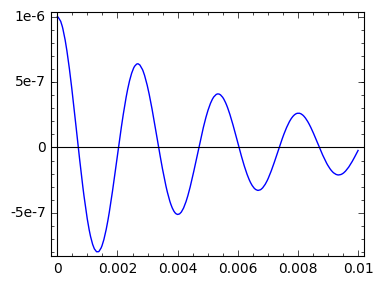

In [6]:
show(plot(plotq_RLC, (0, 0.01)),frame=True,figsize=4,axes=True) 

In [7]:
plot_I=I.subs(t0=0, q0=1e-6, I0=0, L=12e-2, C=1.5e-6, R=40)
omega=1/(sqrt(L*C))
ZL=i*omega*L;ZC=1/i*omega*C;ZL,ZC

(I*L/sqrt(C*L), -I*C/sqrt(C*L))

In [8]:
pb=plot(plotq_RLC, (0, 0.01),color="blue")
pr=plot(plot_I, (0, 0.01),color="red")

In [9]:
@interact 
def _(t0=0, q0=1e-6, I0=0, 
      L=slider(1e-3,1e0,0.01,12e-2), 
      C=slider(1e-9,1e-5,1e-7, 1.5e-6),
      R=slider(0, 200, 2, 40), tmax=1e-2):
    a=plot(q_RLC(t0=t0, 
                    q0=q0, I0=I0, L=L, C=C, R=R),
              (t,0,tmax), color='blue', figsize=8)
    b=plot(I(t0=t0, q0=q0, I0=I0, L=L, C=C, R=R),
              (t,0,tmax), color='red', figsize=8)
    show(a+b)

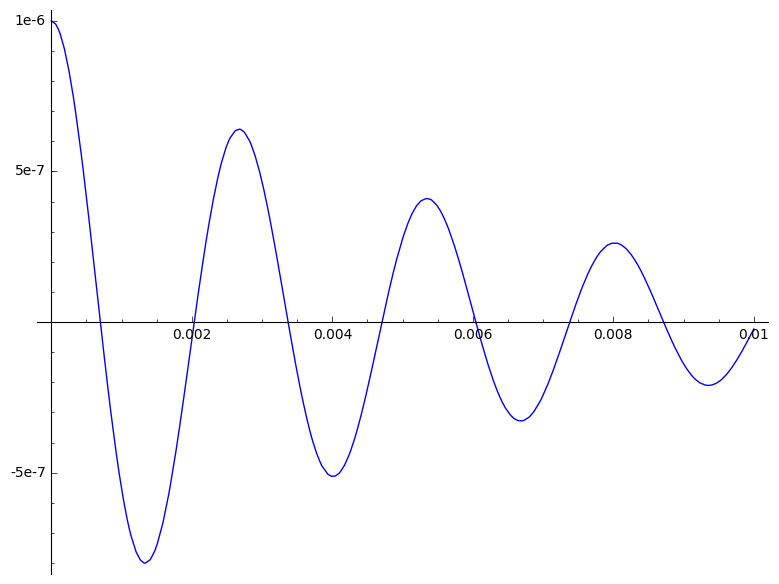

In [10]:
pb

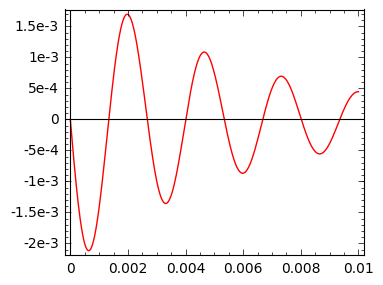

In [11]:
show(plot(plot_I, (0, 0.01),color="red"),frame=True,figsize=4,axes=True)

(A) Déterminer la dépendance temporelle de la charge électrique Q (t) aux bornes du condensateur avec une capacité C et du courant I (t) circulant dans le circuit RLC série avec une source externe de Silly elektormotorycznej E = E0 * sincot, en supposant qu'à l'instant t0 la valeur de la charge de sur le condensateur est q0 et le courant dans le circuit I0.

(B) dessiner des graphiques q (t) et I (t), en supposant que les paramètres suivants des éléments de circuit R = 40Ω, L = 12e-2 H, C = 1.5e-6 F applique des amplitude SEM E0 = 6V, ω = 50Hz et conditions initiales: q0 = 1e-6 C et I0 = 0 à t0 = 0.

(C) Préparation d'un q interactif (t) et I (t) pour toutes les valeurs de paramètres de circuit et les conditions initiales, en prenant les valeurs par défaut de R, L, C, E0, ω, q0, I0, t0 à partir de (b)

(d) Tracer des graphiques tension-temps sur des éléments individuels du circuit RLC

(e) Tracer un graphique interactif de la dépendance de l'impédance Z sur la fréquence forçant la force électromotrice ω pour le circuit série RLC

Dessinez un diagramme de résonance interactif des courants dans un circuit RLC en série (c'est-à-dire un tracé de l'amplitude du courant par rapport à la fréquence qui force la force électromotrice ω)

In [12]:
var('L,k,C,R,t,t0,q0,I0,E0,omega') 
assume(L>0) 
assume(k>0) 
assume(t>0) 
assume(R>0) 
assume(E0>0) 
assume(omega>0) 
q = function('q')(t)
de = L*diff(q,t,2)==E0*sin(omega*t)-k*q-R*diff(q,t) 
de

L*diff(q(t), t, t) == -k*q(t) + E0*sin(omega*t) - R*diff(q(t), t)

In [13]:
assume(4*k*L-R^2>0) 
sol1o=desolve(de,q,ivar=t) 
forget(4*k*L-R^2>0) 
sol1o

(_K2*cos(1/2*t*sqrt(-R^2/L^2 + 4*k/L)) + _K1*sin(1/2*t*sqrt(-R^2/L^2 + 4*k/L)))*e^(-1/2*R*t/L) - (E0*R*omega*cos(omega*t) + (E0*L*omega^2 - E0*k)*sin(omega*t))/(L^2*omega^4 + (R^2 - 2*L*k)*omega^2 + k^2)

In [14]:
solo=sol1o.subs(k=1/C);
solo

(_K2*cos(1/2*t*sqrt(-R^2/L^2 + 4/(C*L))) + _K1*sin(1/2*t*sqrt(-R^2/L^2 + 4/(C*L))))*e^(-1/2*R*t/L) - (E0*R*omega*cos(omega*t) + (E0*L*omega^2 - E0/C)*sin(omega*t))/(L^2*omega^4 + (R^2 - 2*L/C)*omega^2 + 1/C^2)

In [15]:
assume(4*k*L-R^2>0) 
sol1=desolve(de,q,ivar=t,ics=[t0,q0,I0]) 
forget(4*k*L-R^2>0) 

In [16]:
sol=sol1.subs(k=1/C);

In [17]:
I=diff(sol, t, 1); 

In [18]:
plotsol=sol.subs(t0=0, q0=1e-6, 
                 I0=0, L=12e-2, C=1.5e-6,
                 R=40, E0=6, omega=50);

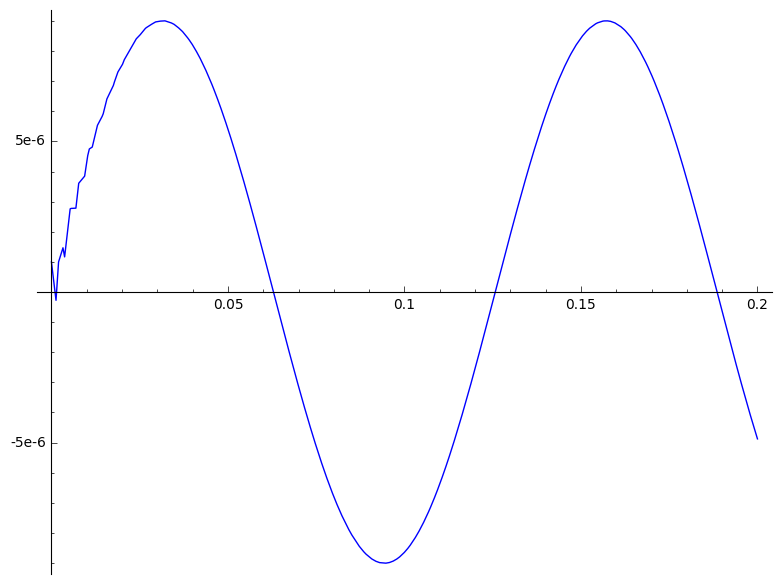

In [19]:
plot(plotsol, (0, 0.2))

In [20]:
plot_I=I.subs(t0=0, q0=1e-6, 
              I0=0, L=12e-2, C=1.5e-6, 
              R=40, E0=6, omega=50);

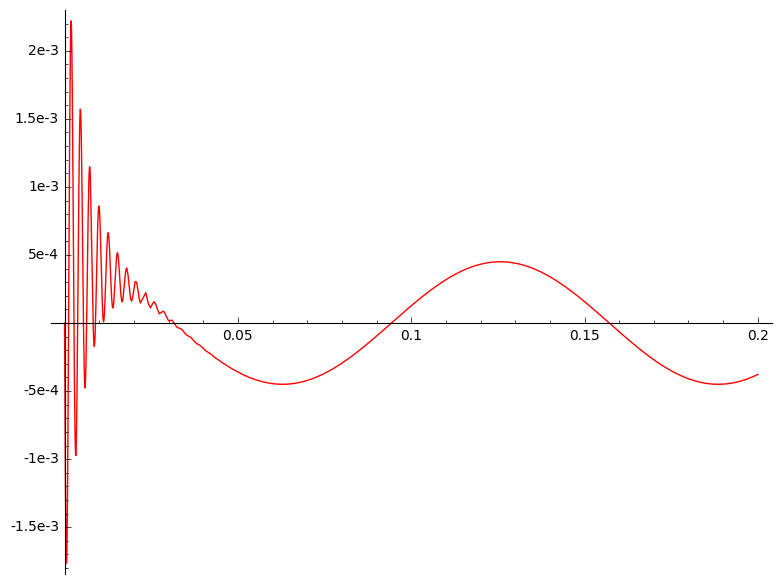

In [21]:
plot(plot_I, (0, 0.2), color='red')

In [22]:
@interact
def _(t0=0, q0=1e-6, I0=0, L=slider(1e-3,1e0,0.01,12e-2), C=slider(1e-9,1e-5,1e-7, 1.5e-6), R=slider(0, 200, 2, 40), E0=slider(0, 200, 2, 6), omega=slider(0, 200, 2, 50), tmax=0.3): 
    show(plot(sol(t0=t0, q0=q0, I0=I0, L=L, C=C, R=R, E0=E0, omega=omega), (t,0,tmax), color='blue', figsize=8)), show(plot(I(t0=t0, q0=q0, I0=I0, L=L, C=C, R=R, E0=E0, omega=omega), (t,0,tmax), color='red', figsize=8))

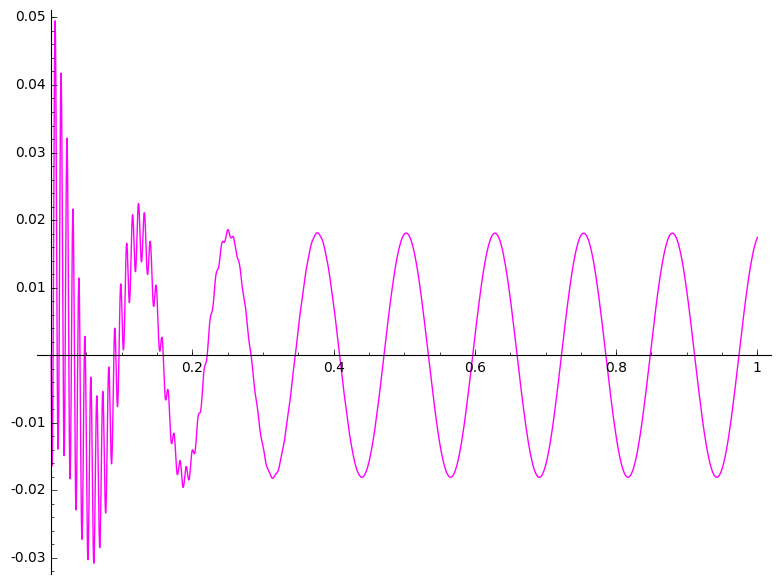

In [23]:
UR=R*I;
plot_UR=UR.subs(t0=0, q0=1e-6, I0=0, L=12e-1,
                C=1.5e-6, R=40, E0=6, omega=50);
plot(plot_UR, (0, 1), color='magenta')

In [24]:
UL = L*diff(I,t,1);
plot_UL=UL.subs(t0=0, q0=1e-6, I0=0,
                L=12e-1, C=1.5e-6, R=60, E0=6, omega=50);

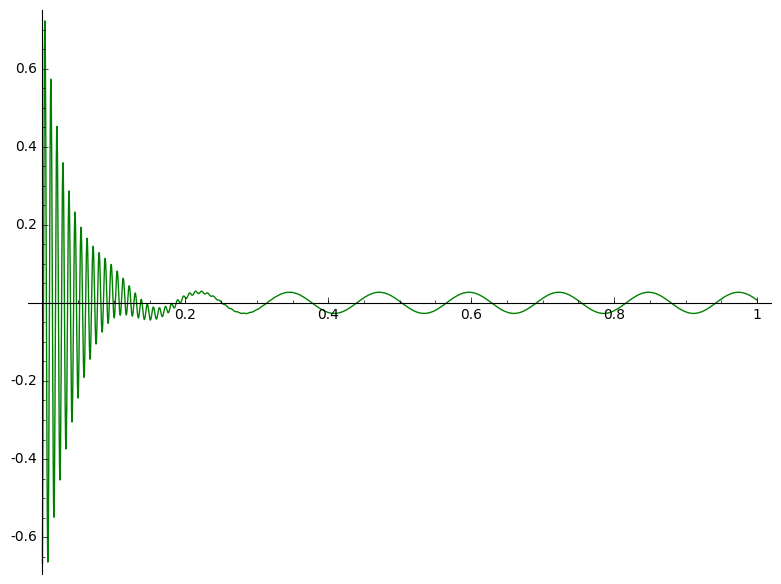

In [25]:
plot(plot_UL, (0, 1), color='green')

In [26]:
UC=sol/C;

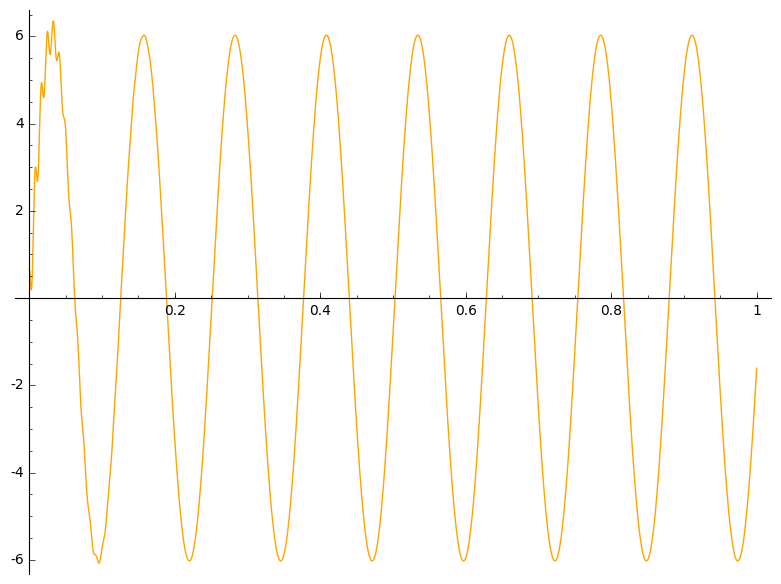

In [27]:
plot_UC=UC.subs(t0=0, q0=1e-6, I0=0, 
                L=12e-1, C=1.5e-6, R=60,
                E0=6, omega=50);
plot(plot_UC, (0, 1), color='orange')

In [28]:
var('f')
Z = function('Z')(f)
Z=sqrt(R^2+(2*pi*f*L-(1/(2*pi*f*C)))^2);
Z

sqrt(1/4*(4*pi*L*f - 1/(pi*C*f))^2 + R^2)

In [29]:
Imax = function('Imax') (f)
Imax = E0/sqrt(R^2+(2*pi*f*L-(1/(2*pi*f*C)))^2);
Imax

E0/sqrt(1/4*(4*pi*L*f - 1/(pi*C*f))^2 + R^2)

In [30]:
@interact
def _(L=slider(1e-3,1e0,0.01,12e-2), C=slider(1e-9,1e-5,1e-7, 1.5e-6), R=slider(0, 200, 2, 40), E0=slider(0, 200, 2, 6), fmax=1e3):
    show(plot(Z(L=L, C=C, R=R), (f,1e1,fmax), color='cyan', figsize=8)), 
    show(plot(Imax(L=L, C=C, R=R, E0=E0), (f,1e1,fmax), color='violet', figsize=8))
    f0=N(1/(2*pi*sqrt(L*C)))
    print "Résonance  f=f0=1/(2*pi*sqrt(L*C)) :", f0, "Hz"